In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import warnings

# Set the theme for seaborn plots
sns.set_theme(style="darkgrid")

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv("/content/drive/MyDrive/Machine_learning_in_Data_Science/Life_Expectancy_Data.csv")
print(train_data.head(), train_data.info())

Mounted at /content/drive
       Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Populatio

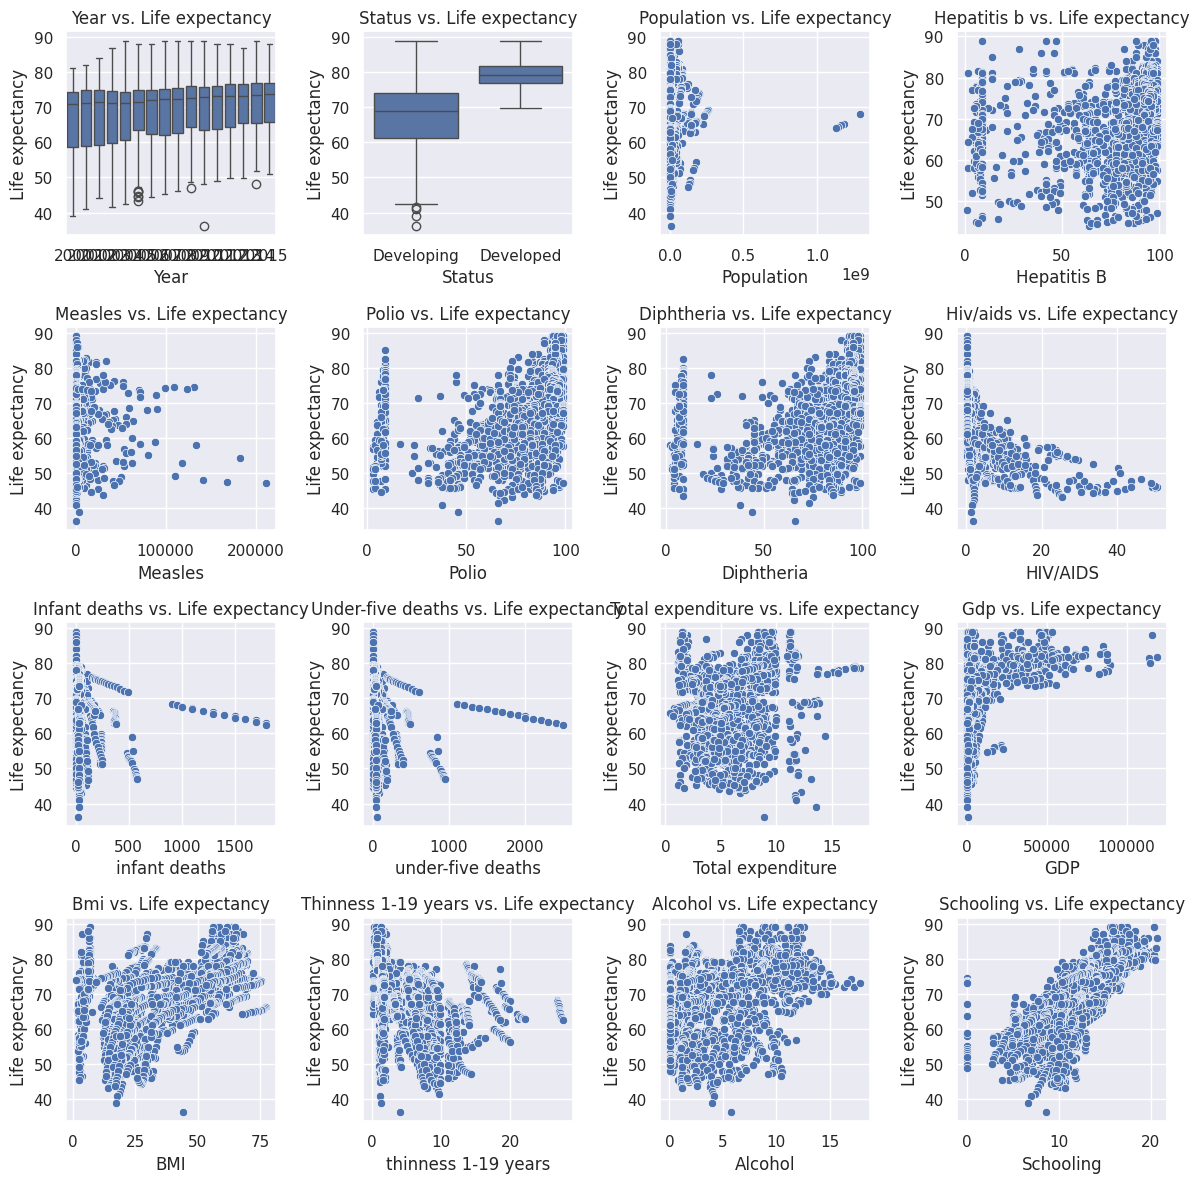

In [ ]:
# Create subplots for visualizing the relationships between features and the target variable
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
box_cols = ['Year', 'Status']
scatter_cols = ['Population', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths',
                'under-five deaths', 'Total expenditure', 'GDP', 'BMI', 'thinness 1-19 years', 'Alcohol',
                'Schooling']

# Plot box plots for categorical features vs. Life expectancy
for i, col in enumerate(box_cols):
    ax = axes[i // 4, i % 4]
    sns.boxplot(data=train_data, x=col, y='Life expectancy', ax=ax)
    ax.set_title(f"{col.capitalize()} vs. Life expectancy")

# Plot scatter plots for numerical features vs. Life expectancy
for i, col in enumerate(scatter_cols):
    ax = axes[(i + len(box_cols)) // 4, (i + len(box_cols)) % 4]
    sns.scatterplot(data=train_data, x=col, y='Life expectancy', ax=ax)
    ax.set_title(f"{col.capitalize()} vs. Life expectancy")

plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values in the 'Life expectancy' column
print(train_data['Life expectancy'].isnull().sum())

10


In [ ]:
# Drop rows where 'Life expectancy' is missing
train_data = train_data.dropna(subset=['Life expectancy'])

In [ ]:
# Separate the features and the target variable
Y = train_data['Life expectancy']
X = train_data.drop(columns=['Life expectancy'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
# Handle missing values in numerical columns by imputing the mean
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_val_numeric = X_val.select_dtypes(include=['float64', 'int64'])
X_train_numeric = numeric_imputer.fit_transform(X_train_numeric)
X_val_numeric = numeric_imputer.transform(X_val_numeric)

In [ ]:
# Handle missing values in categorical columns by imputing the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = X_train.select_dtypes(include=['object'])
X_val_categorical = X_val.select_dtypes(include=['object'])
X_train_categorical = categorical_imputer.fit_transform(X_train_categorical)
X_val_categorical = categorical_imputer.transform(X_val_categorical)

In [ ]:
# Combine the imputed numerical and categorical columns
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_val_imputed = np.hstack((X_val_numeric, X_val_categorical))

In [ ]:
# Identify the categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = one_hot_encoder.fit_transform(X_train_imputed[:, -len(categorical_cols):])
X_val_encoded = one_hot_encoder.transform(X_val_imputed[:, -len(categorical_cols):])


# Combine the numerical and one-hot encoded categorical columns
X_train_processed = np.hstack((X_train_imputed[:, :-len(categorical_cols)], X_train_encoded.toarray()))
X_val_processed = np.hstack((X_val_imputed[:, :-len(categorical_cols)], X_val_encoded.toarray()))

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed)
X_val_processed = scaler.transform(X_val_processed)

In [ ]:
# List of models to be evaluated
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
]

# Train and evaluate each model
for model in models:
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_val_processed)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"Model: {type(model).__name__}, MSE: {mse}, MAE: {mae}, R2: {r2}")

Model: LinearRegression, MSE: 4.840493834631018, MAE: 1.2766374943975916, R2: 0.9448807928935135
Model: DecisionTreeRegressor, MSE: 7.041075085324231, MAE: 1.5742320819112627, R2: 0.9198225451494884
Model: RandomForestRegressor, MSE: 3.1265206211604073, MAE: 1.077064846416381, R2: 0.964397984270219
Model: GradientBoostingRegressor, MSE: 5.090962304789099, MAE: 1.5864186052095146, R2: 0.9420286823543952
Model: ExtraTreesRegressor, MSE: 2.7475429965870295, MAE: 0.8394334470989755, R2: 0.9687134419262408


In [ ]:
# Define hyperparameter grid for tuning the Decision Tree Regressor
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Perform grid search for hyperparameter tuning
model = DecisionTreeRegressor()
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_processed, y_train)

# Output the best parameters and R2 score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best R2 Score: 0.9272375320062978


In [ ]:
# Apply polynomial transformation to the features
poly_transformer = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly_transformer.fit_transform(X_train_processed)
X_val_poly = poly_transformer.transform(X_val_processed)

# Train and evaluate a linear regression model on the polynomial features
model_LR = LinearRegression()
model_LR.fit(X_train_poly, y_train)
y_pred = model_LR.predict(X_val_poly)

# Output the evaluation metrics for the polynomial regression model
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Model: {type(model_LR).__name__}, MSE: {mse}, MAE: {mae}, R2: {r2}")

Model: LinearRegression, MSE: 102194.58781659382, MAE: 96.82532414191928, R2: -1162.70040815355


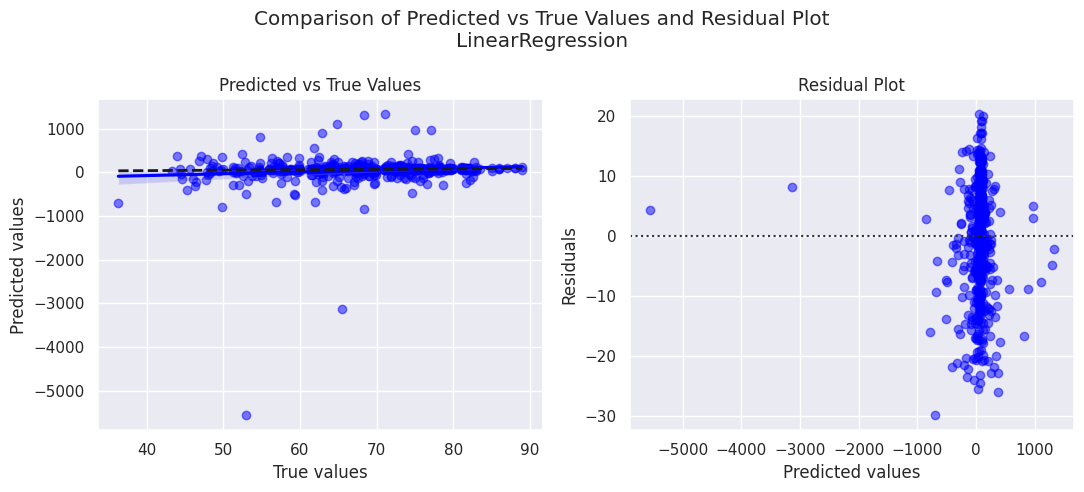

In [ ]:
# Plot the results of the polynomial regression
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
sns.regplot(x=y_val, y=y_pred, color='blue', scatter_kws={'alpha':0.5}, ax=axes[0])
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
axes[0].set_xlabel('True values')
axes[0].set_ylabel('Predicted values')
axes[0].set_title('Predicted vs True Values')

# Residual plot
residuals = y_val - y_pred
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5}, ax=axes[1])
axes[1].plot([y_val.min(), y_val.max()], [0, 0], 'k--', lw=2)
axes[1].set_xlabel('Predicted values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Add a title to the figure and adjust the layout
fig.suptitle(f'Comparison of Predicted vs True Values and Residual Plot\n{type(model_LR).__name__}')
plt.tight_layout()
plt.show()